In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
from collections import Counter
from sklearn.preprocessing import StandardScaler

#Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.svm import SVC, SVR

#Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

# Cross Validation
from sklearn.model_selection import GridSearchCV
wr.filterwarnings('ignore')

#**Wine quality dataset**

In [2]:
df = pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


###EDA

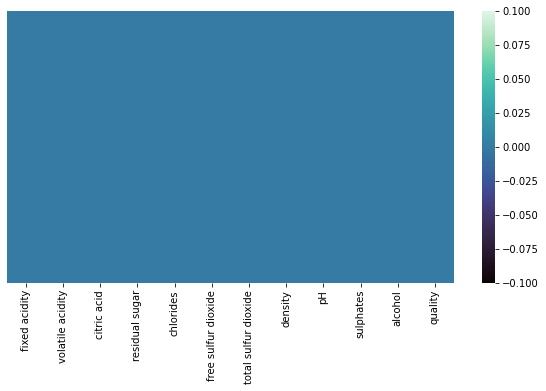

In [6]:
#check for missing values:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='mako')

In [7]:
#check for missing values:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

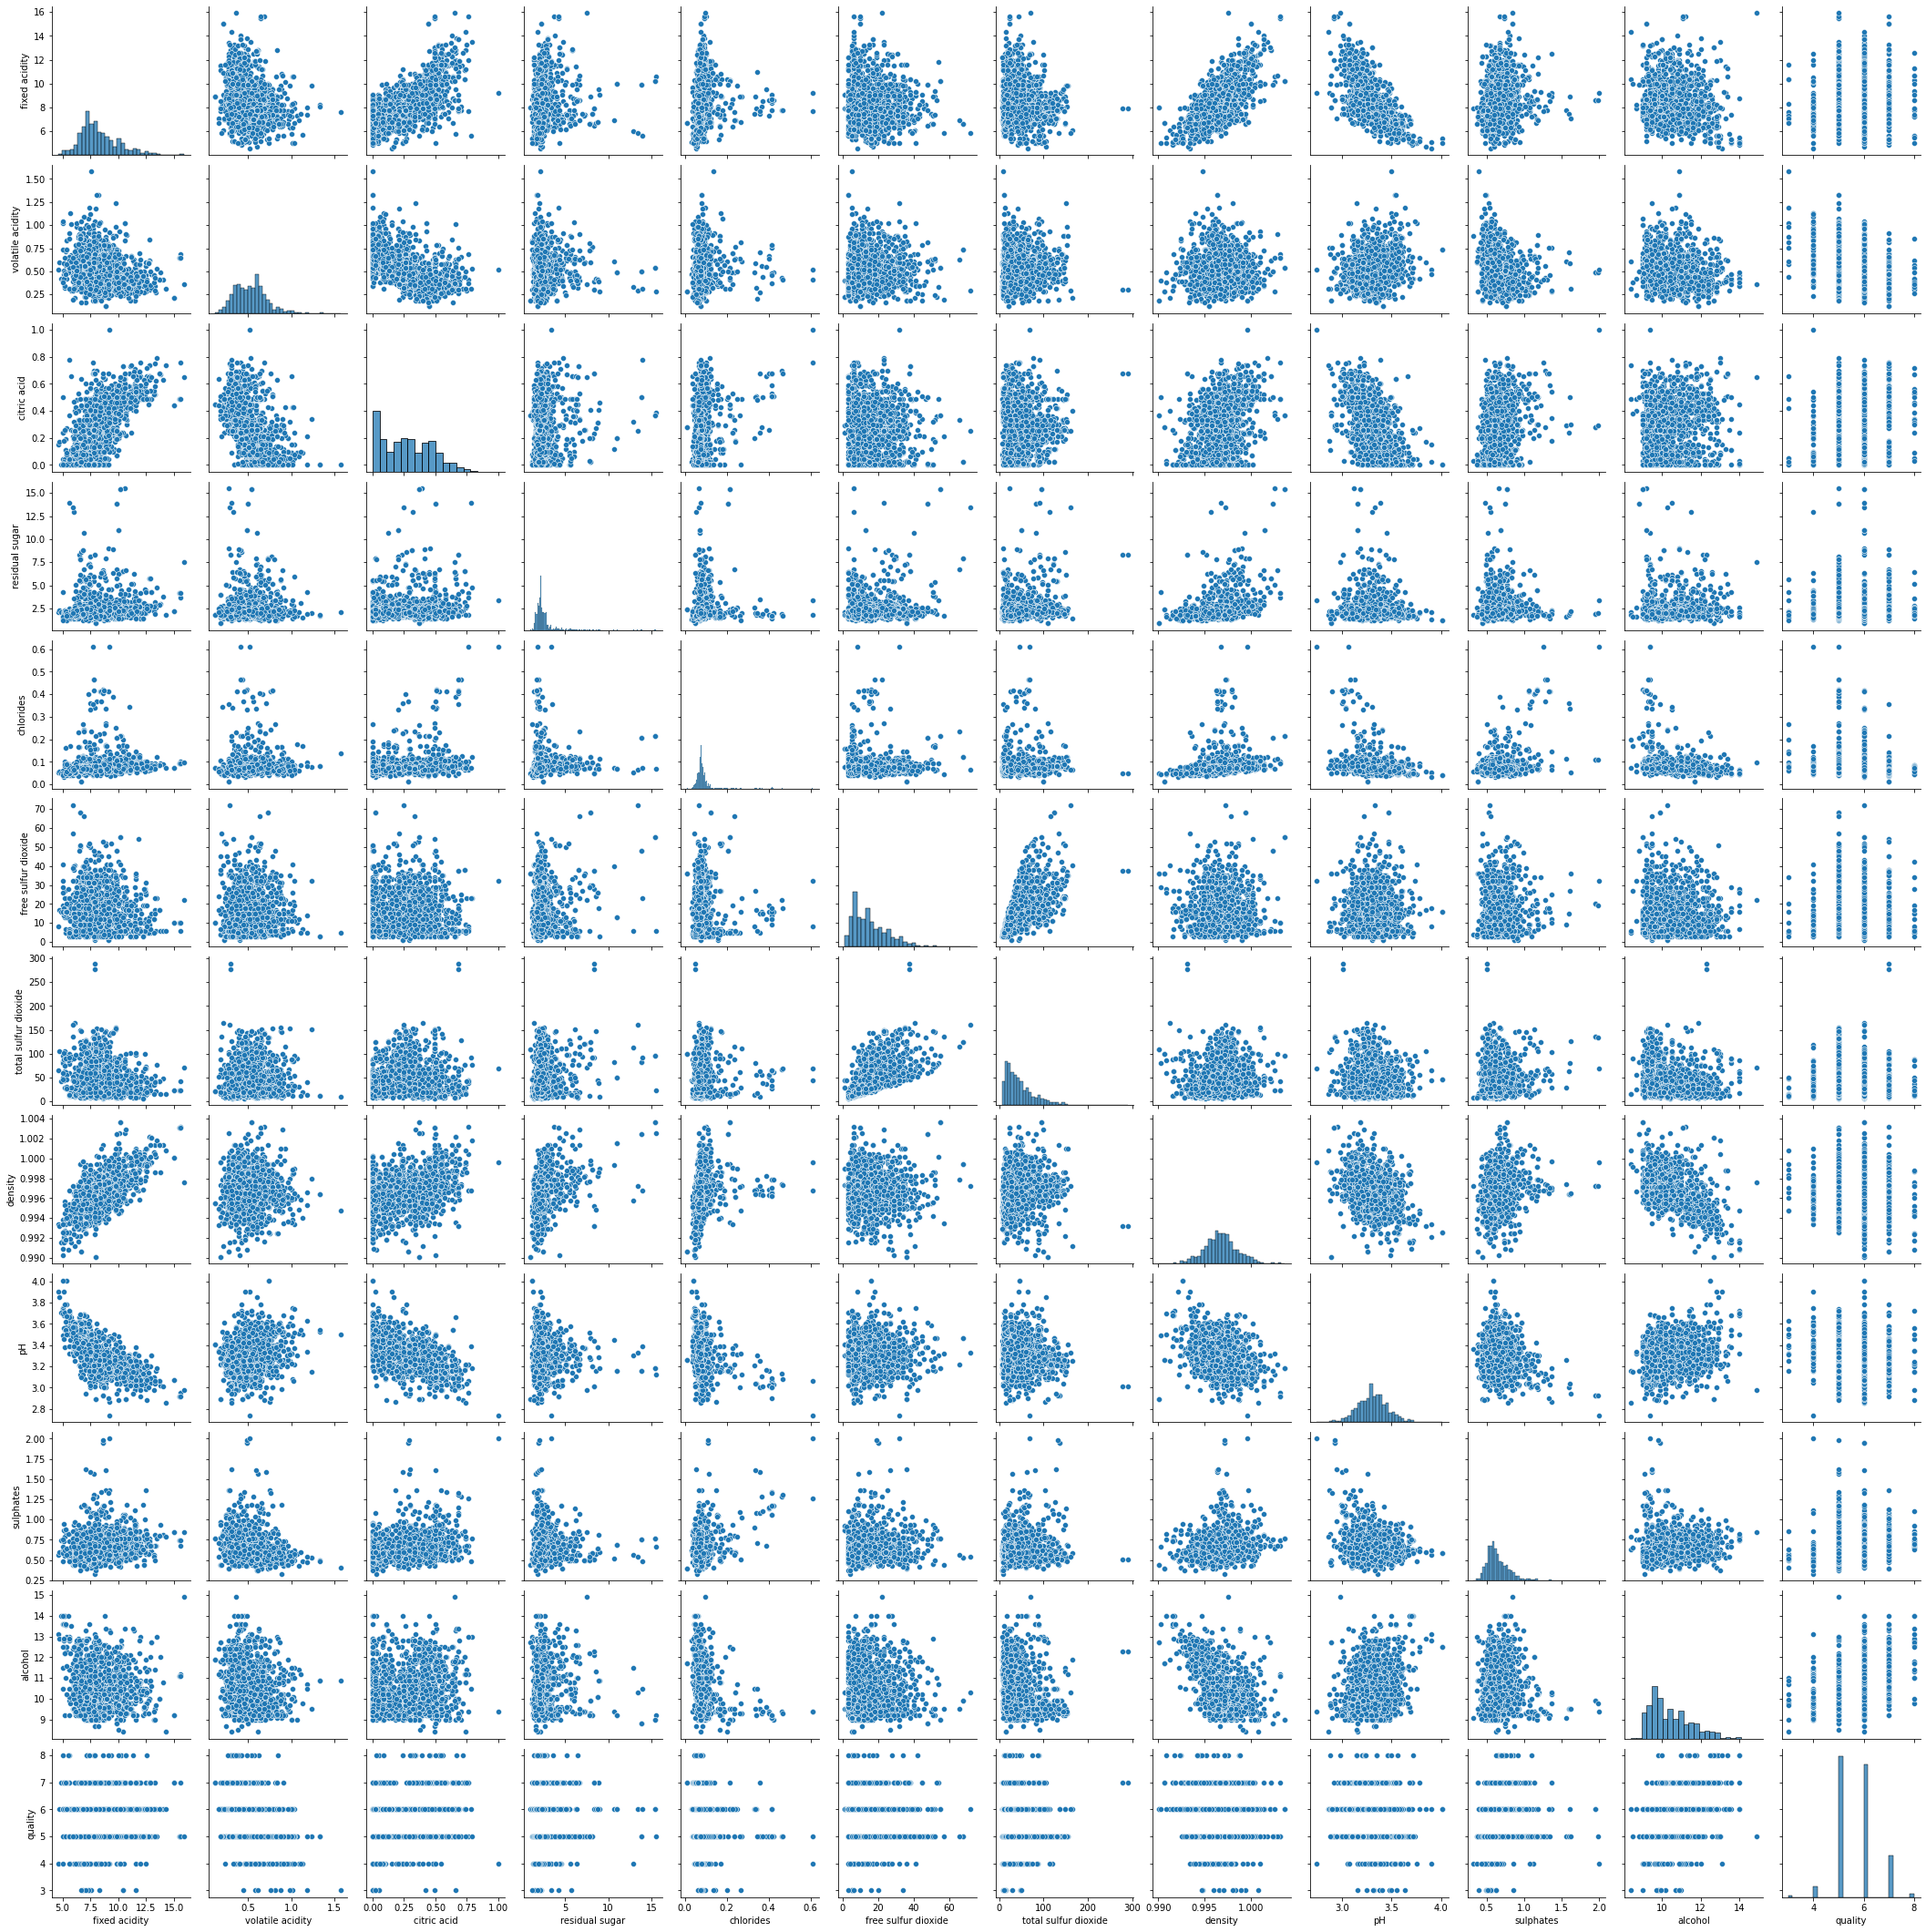

In [8]:
sns.pairplot(df)

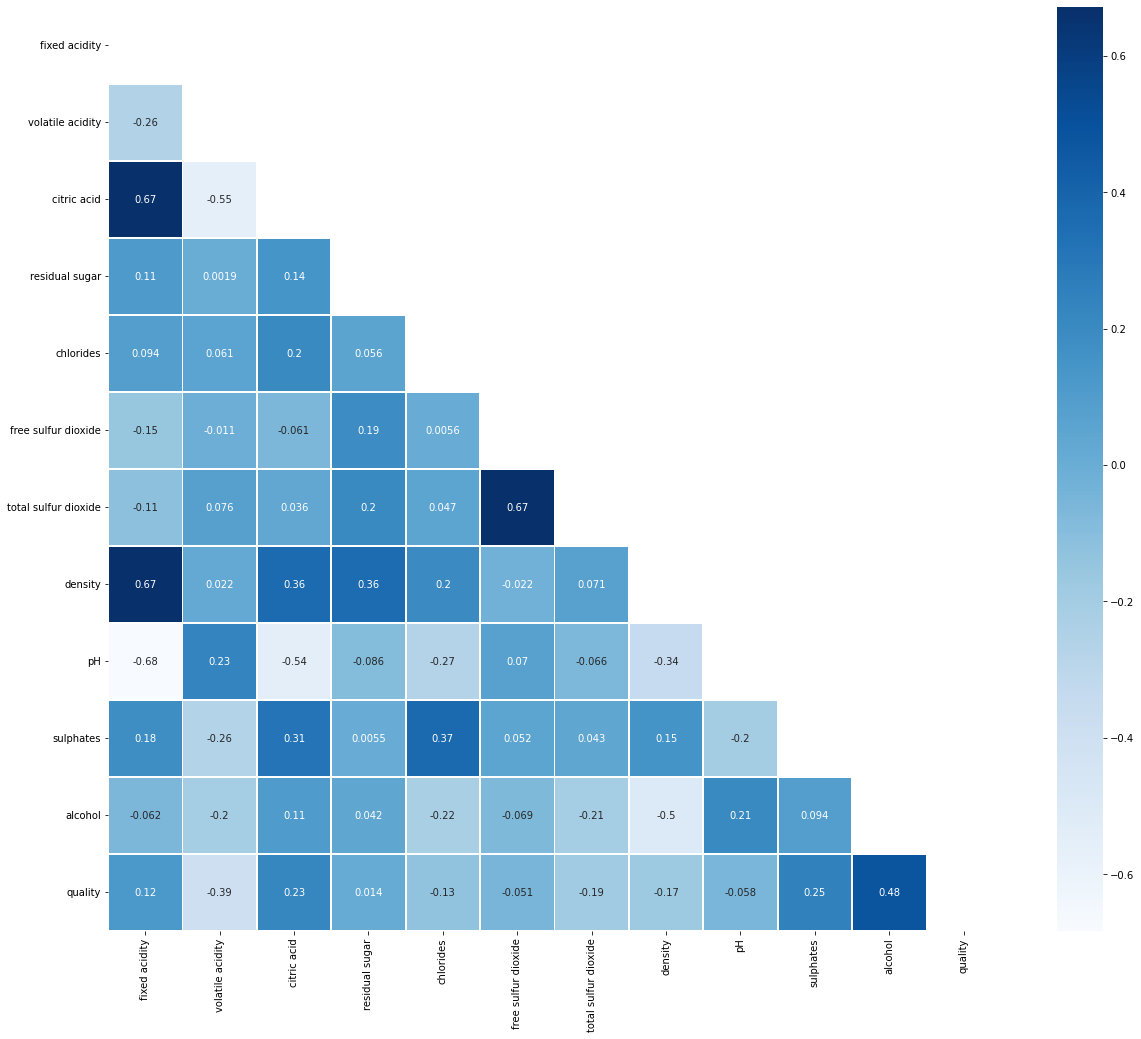

In [9]:
plt.figure(figsize=(20, 17))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="Blues");

In [10]:
def helper(row):
    if row.quality < 4.5:
        return 0
    elif row.quality < 6.5:
        return 1
    else:
        return 2
        
df["quality"] = df.apply(helper,axis=1)
df['quality'].value_counts()

1    1319
2     217
0      63
Name: quality, dtype: int64

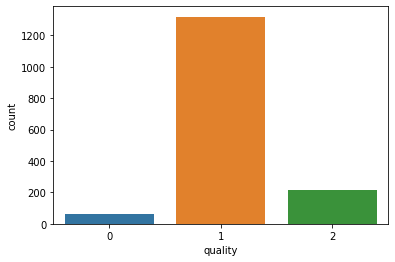

In [11]:
sns.countplot(x='quality',data=df)

In [12]:
def draw_multivarient_plot(dataset, rows, cols, plot_type):    
    column_names = dataset.columns.values
    number_of_column = len(column_names)
    fig, axarr=plt.subplots(rows,cols, figsize=(22,16))
    counter=0
    for i in range(rows):
        for j in range(cols):
            if 'box'in plot_type :
                sns.boxplot(x=dataset.iloc[: , -1], y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'bar' in plot_type:
                sns.barplot(x=dataset.iloc[: , -1],y=column_names[counter],data=dataset, ax=axarr[i][j])
                
            counter+=1
            if counter==(number_of_column-1,):
                break

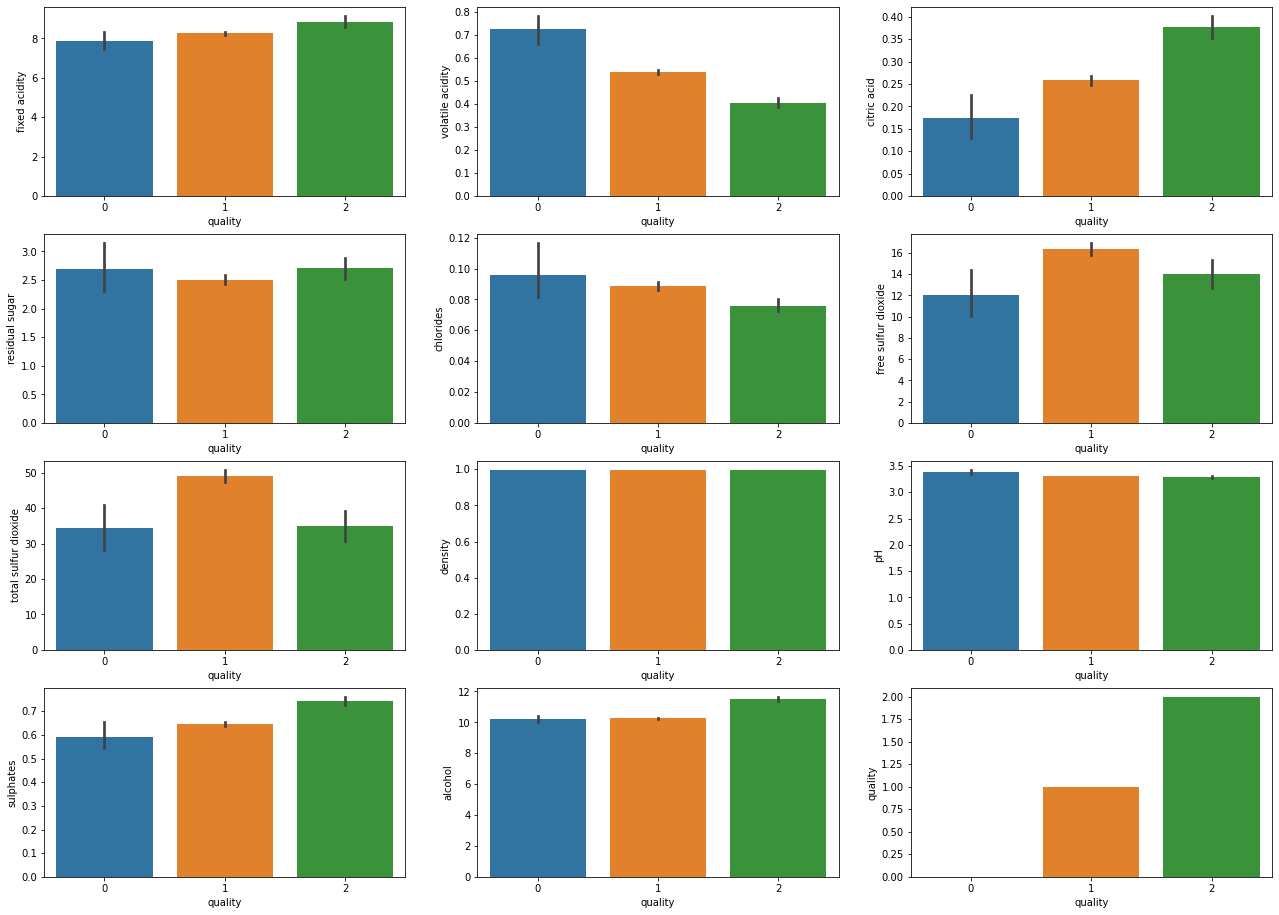

In [13]:
draw_multivarient_plot(df,4,3,"bar")

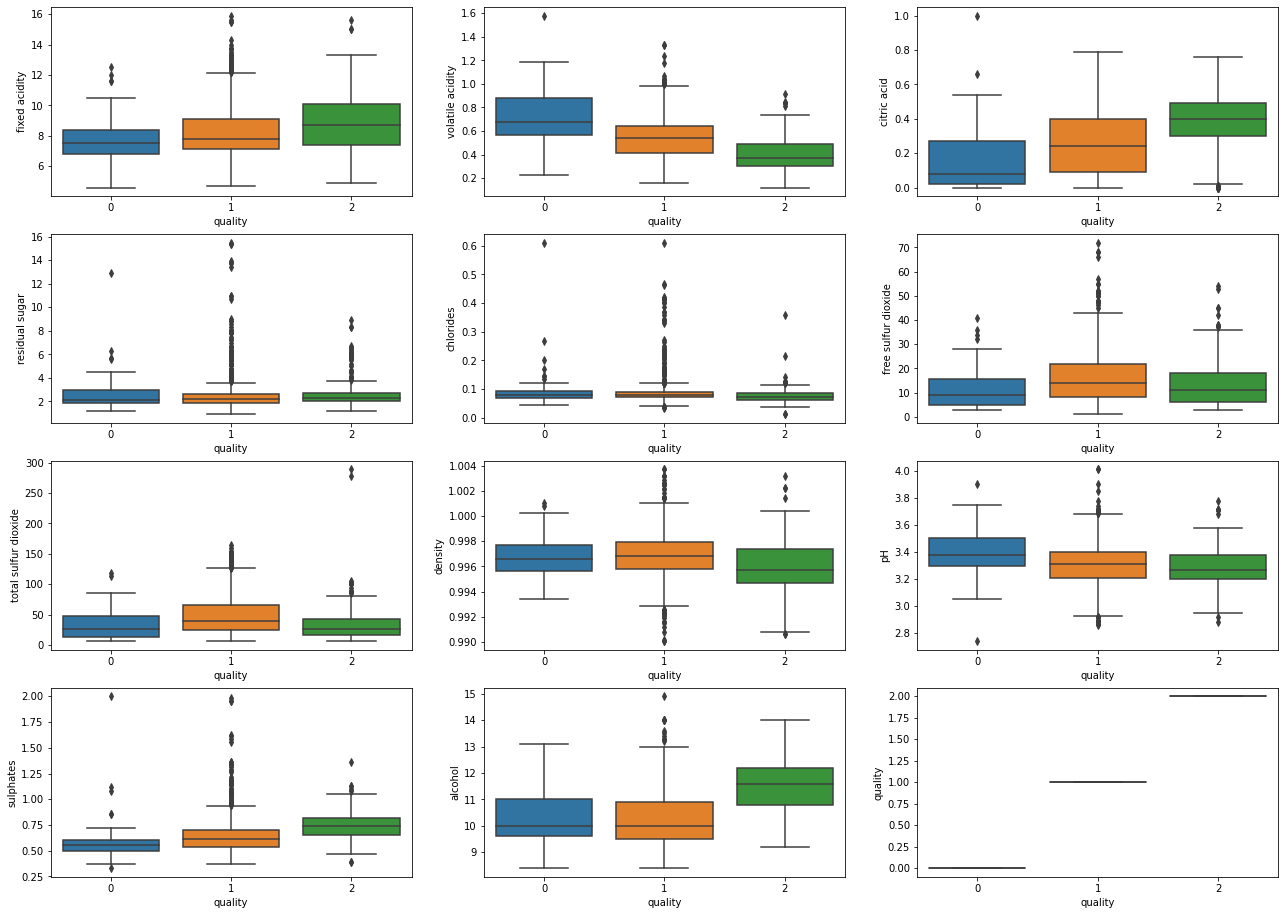

In [14]:
draw_multivarient_plot(df,4,3,"box")

In [15]:
def outliers(columns):
    outlier_indices = []

    for column in columns:
        # 1st quartile
        Q1 = np.percentile(df[column], 25)
        # 3st quartile
        Q3 = np.percentile(df[column], 75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[column] < Q1 - outlier_step)
                              | (df[column] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1.5)

    return multiple_outliers

In [16]:
print("number of outliers detected --> ",
      len(df.loc[outliers(df.columns[:-1])]))

number of outliers detected -->  120


In [17]:
df.loc[outliers(df.columns[:-1])]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
294,13.3,0.340,0.52,3.2,0.094,17.0,53.0,1.00140,3.05,0.81,9.500000,1
338,12.4,0.490,0.58,3.0,0.103,28.0,99.0,1.00080,3.16,1.00,11.500000,1
339,12.5,0.280,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.800000,2
353,13.5,0.530,0.79,4.8,0.120,23.0,77.0,1.00180,3.18,0.77,13.000000,1
364,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1228,5.1,0.420,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.600000,2
1269,5.5,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.000000,2
1270,5.0,0.380,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.000000,1
1475,5.3,0.470,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.566667,2


In [18]:
data = df.drop(outliers(df.columns[:-1]),axis = 0).reset_index(drop = True)

In [19]:
X = data.drop('quality', axis=1)
y = data['quality']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [21]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

###Linear Regression

In [22]:
ln = LinearRegression()
ln.fit(X_train, y_train)
pred_ln = ln.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred_ln))
print('MSE:', metrics.mean_squared_error(y_test, pred_ln))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ln)))
print('R-Squared: ',ln.score(X_train, y_train))

MAE: 0.24925831193192508
MSE: 0.12987558103526126
RMSE: 0.3603825481835396
R-Squared:  0.24964388790199998


###K-Nearest Neighbors - KNN

In [23]:
param_grid = {'n_neighbors':np.arange(1,50), 'weights':['uniform','distance'], 'leaf_size':np.arange(1,10)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train, y_train)
y_pred = knn_cv.predict(X_test)
print(knn_cv.best_params_)
print(knn_cv.best_score_)
print(classification_report(y_pred,y_test))

{'leaf_size': 1, 'n_neighbors': 48, 'weights': 'distance'}
0.8816455696202532
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.98      0.87      0.92       277
           2       0.34      0.68      0.46        19

    accuracy                           0.85       296
   macro avg       0.44      0.52      0.46       296
weighted avg       0.93      0.85      0.89       296



###Support Vector Machine - SVM

In [24]:
param = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.1, 1, 10, 100]}
svm = SVC()
svm_cv = GridSearchCV(svm, param, cv=5)
svm_cv.fit(X_train, y_train)
y_pred = svm_cv.predict(X_test)
print(svm_cv.best_params_)
print(svm_cv.best_score_)
print(classification_report(y_pred,y_test))

{'C': 1, 'kernel': 'rbf'}
0.8469963527140099
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.98      0.87      0.92       275
           2       0.37      0.67      0.47        21

    accuracy                           0.86       296
   macro avg       0.45      0.51      0.47       296
weighted avg       0.93      0.86      0.89       296



#**Car price dataset**

In [25]:
car = pd.read_csv('/content/CarPrice_Assignment.csv')
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [26]:
car.shape

(205, 26)

In [27]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [28]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [29]:
#check for missing values:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

###EDA

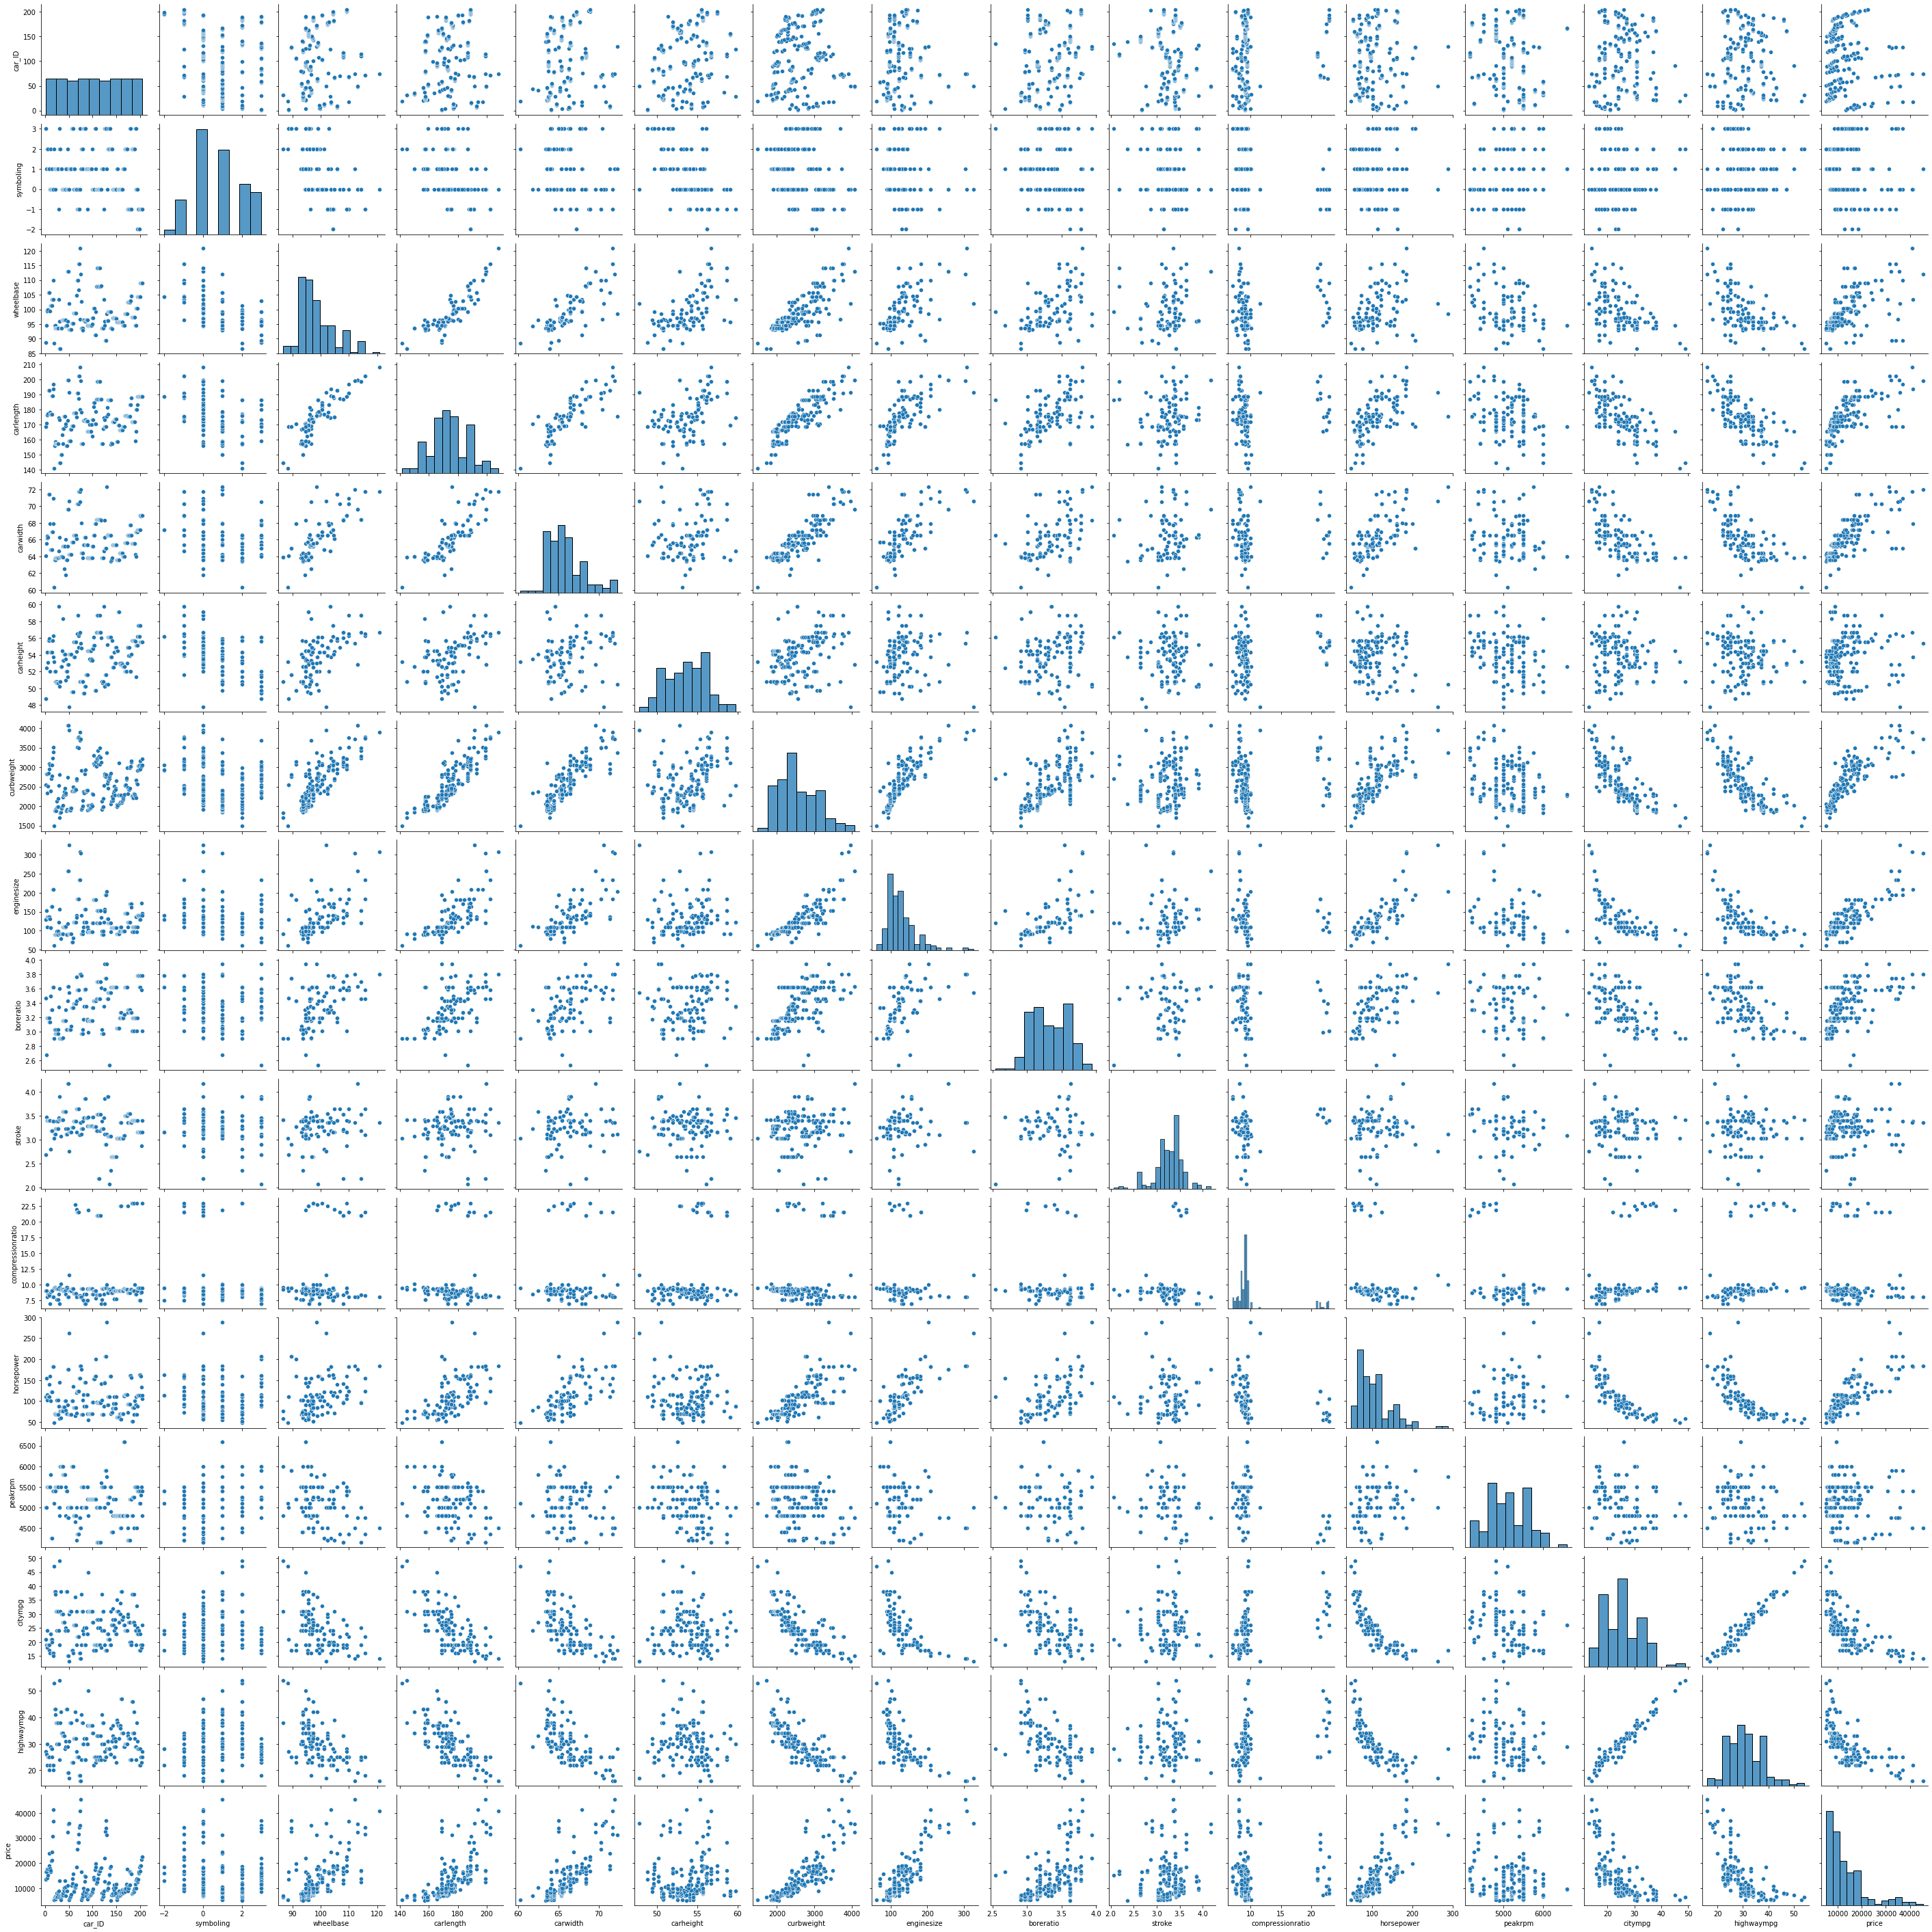

In [30]:
sns.pairplot(car)

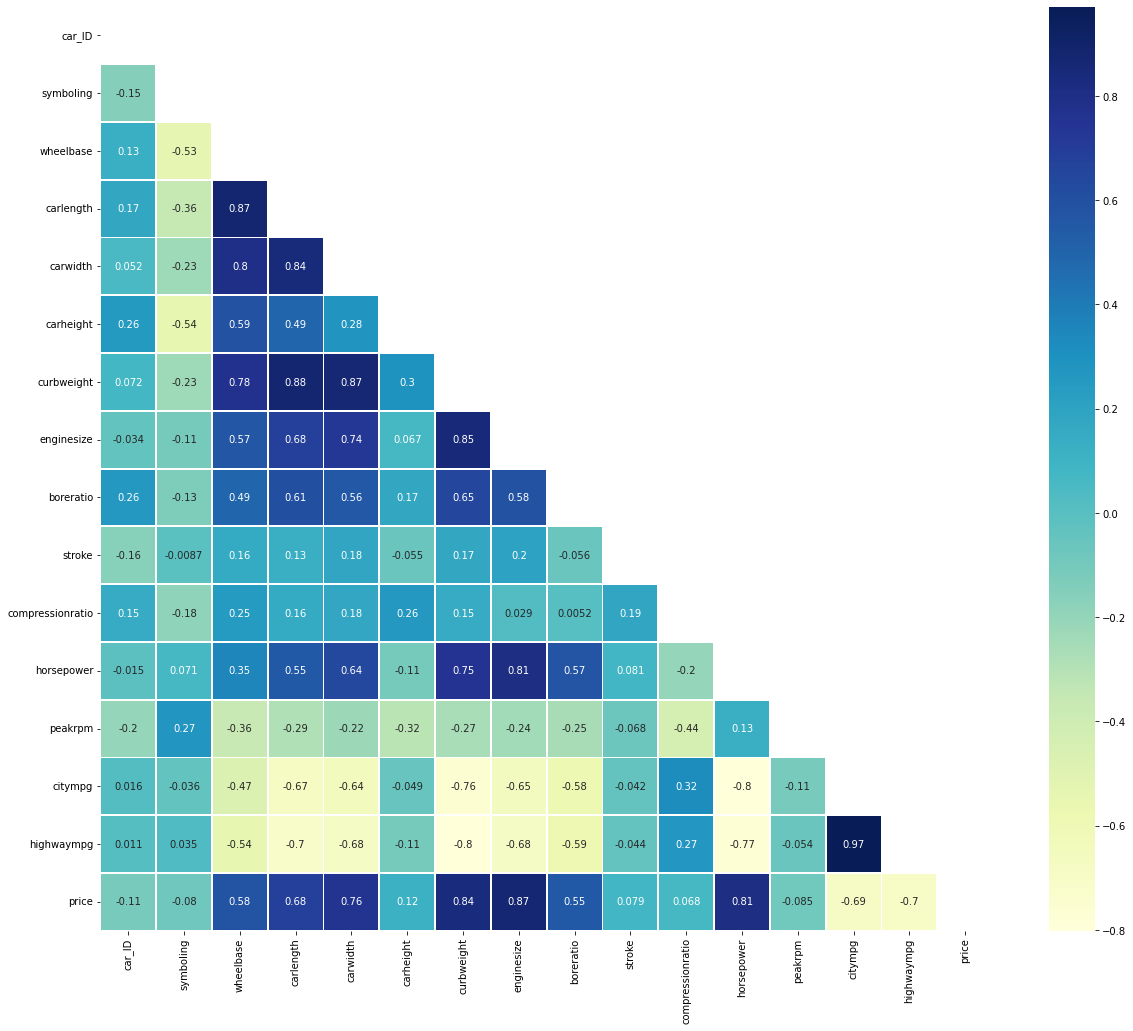

In [31]:
#Correlation using heatmap
plt.figure(figsize = (20, 17))
matrix = np.triu(car.corr())
sns.heatmap(car.corr(), annot = True, linewidth=.8, mask=matrix, cmap="YlGnBu")
plt.show()

In [32]:
#Splitting company name from CarName column
CompanyName = car['CarName'].apply(lambda x : x.split(' ')[0])
car.insert(3,"CompanyName",CompanyName)
car.drop(['CarName'],axis=1,inplace=True)
car.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


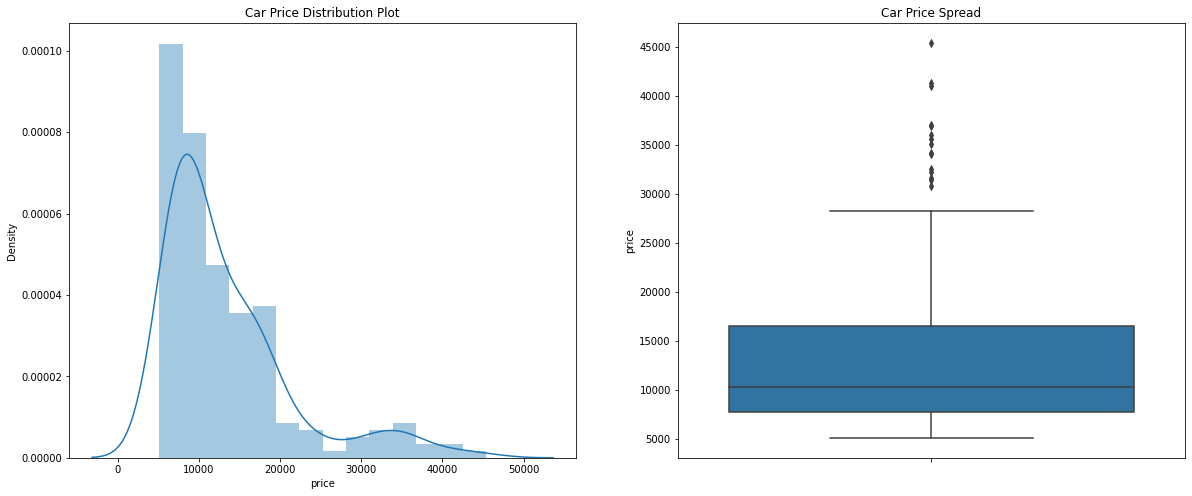

In [33]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(car.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=car.price)

plt.show()

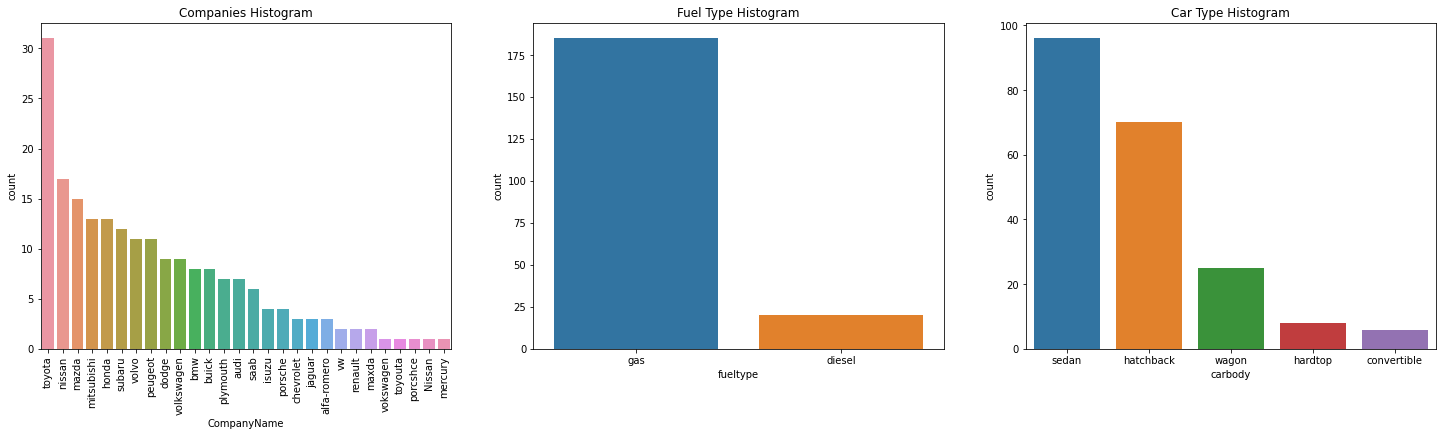

In [34]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt.xticks(rotation = 90)
order = car['CompanyName'].value_counts(ascending=False).index
sns.countplot(x='CompanyName', data=car, order=order)
plt.title('Companies Histogram')

plt.subplot(1,3,2)
order = car['fueltype'].value_counts(ascending=False).index
sns.countplot(x='fueltype', data=car, order=order)
plt.title('Fuel Type Histogram')

plt.subplot(1,3,3)
order = car['carbody'].value_counts(ascending=False).index
sns.countplot(x='carbody', data=car, order=order)
plt.title('Car Type Histogram')

plt.show()

- Toyota seemed to be favored car company.
- Number of gas fueled cars are more than diesel.
- Sedan is the top car type prefered.

In [35]:
num_feature=[ 'wheelbase', 'carlength', 'carwidth', 
             'carheight', 'curbweight',  'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

cat_feature=['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 
             'enginetype', 'fuelsystem','symboling', 'doornumber', 'cylindernumber']

In [36]:
car_num = pd.DataFrame()
for i in num_feature:
  car_num[i] = car[i]
car_num['price'] = car['price']
car_num.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [37]:
car_cat = pd.DataFrame()
for i in cat_feature:
  car_cat[i] = car[i]
car_cat['price'] = car['price']
car_cat.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,symboling,doornumber,cylindernumber,price
0,gas,std,convertible,rwd,front,dohc,mpfi,3,two,four,13495.0
1,gas,std,convertible,rwd,front,dohc,mpfi,3,two,four,16500.0
2,gas,std,hatchback,rwd,front,ohcv,mpfi,1,two,six,16500.0
3,gas,std,sedan,fwd,front,ohc,mpfi,2,four,four,13950.0
4,gas,std,sedan,4wd,front,ohc,mpfi,2,four,five,17450.0


In [38]:
def draw_multivarient_plot(dataset, rows, cols, plot_type):    
    column_names = dataset.columns.values
    number_of_column = len(column_names)
    fig, axarr=plt.subplots(rows,cols, figsize=(22,16))
    counter=0
    for i in range(rows):
        for j in range(cols):
            if 'box'in plot_type :
                sns.boxplot(y=dataset.iloc[: , -1], x=column_names[counter],data=dataset, ax=axarr[i][j], palette='RdBu')
            elif 'bar' in plot_type:
                sns.barplot(y=dataset.iloc[: , -1],x=column_names[counter],data=dataset, ax=axarr[i][j], palette='RdBu')
            elif 'his' in plot_type:
                sns.countplot(column_names[counter],data=dataset, ax=axarr[i][j], palette='RdBu')

            counter+=1
            if counter==(number_of_column-1,):
                break

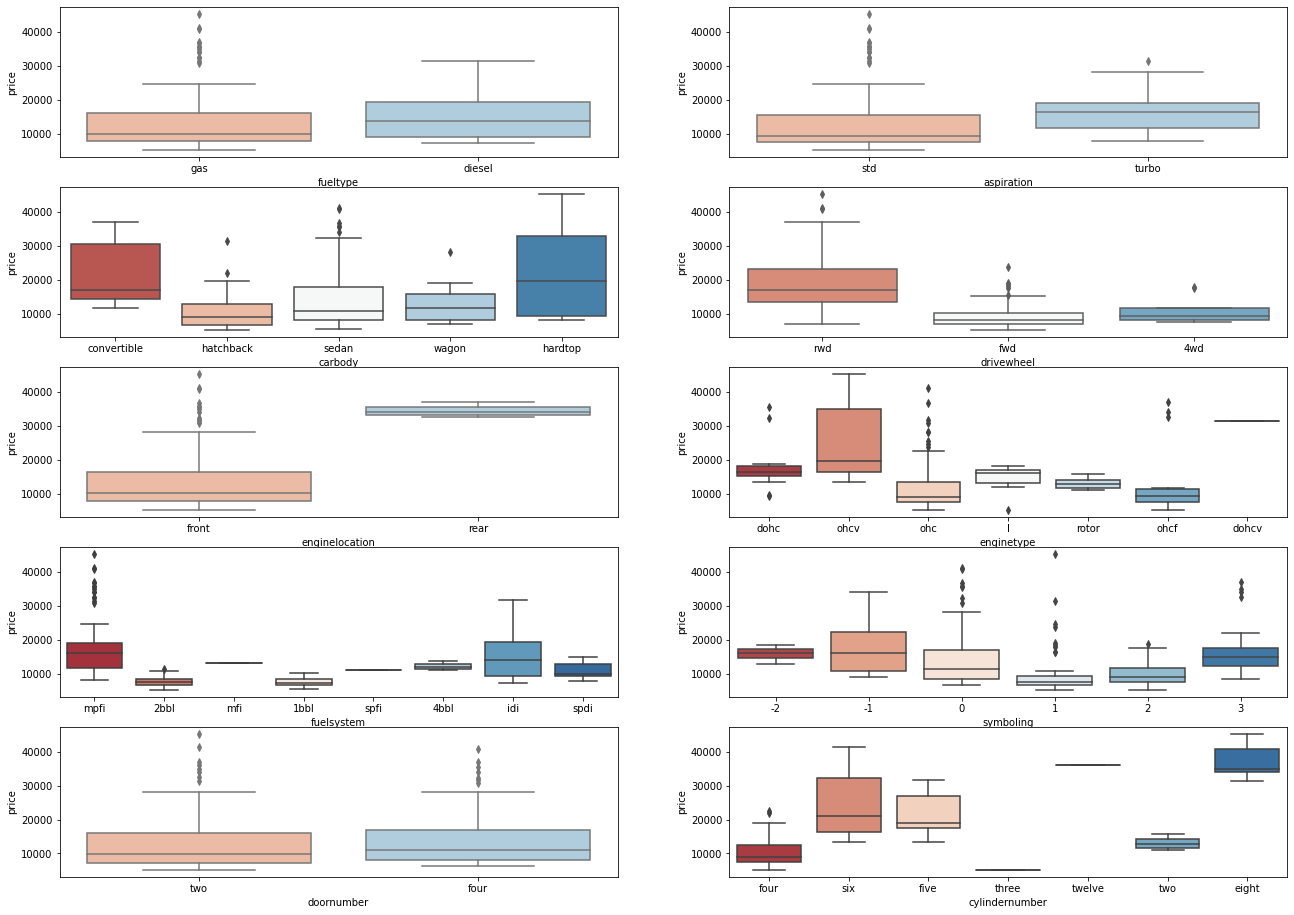

In [39]:
draw_multivarient_plot(car_cat,5,2,"box")

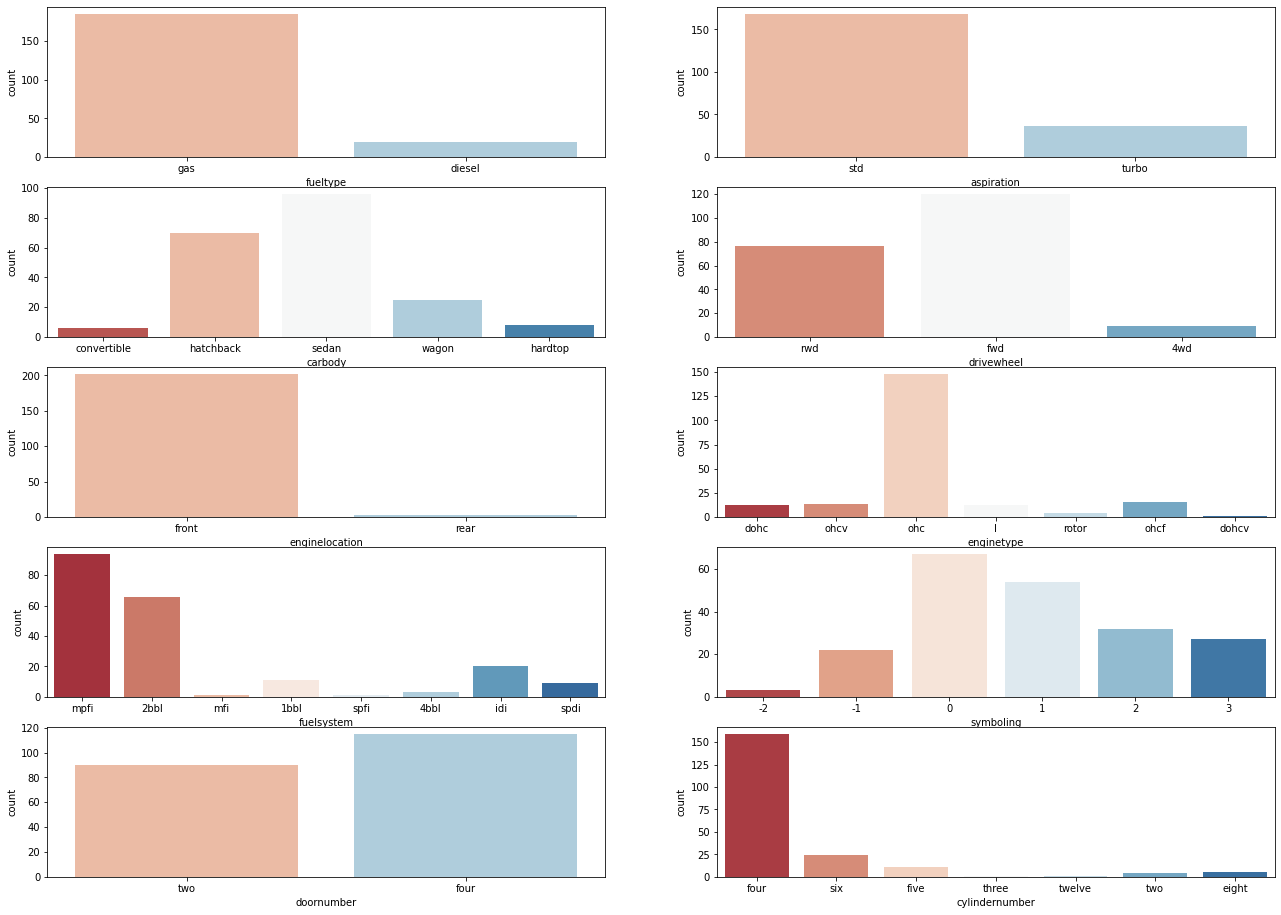

In [40]:
draw_multivarient_plot(car_cat,5,2,"his")

In [41]:
dummies = pd.get_dummies(car[cat_feature])

car_data = pd.concat([car[num_feature+['price']], dummies], axis=1)
car_data.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,doornumber_four,doornumber_two,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,3,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,3,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,2,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,2,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
num_vars = num_feature + ['price']
car_data[num_vars] = scaler.fit_transform(car_data[num_vars])

X = car_data.drop('price', axis=1)
y = car_data['price']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

###Linear Regression

In [44]:
ln = LinearRegression()
ln.fit(X_train, y_train)
pred_ln = ln.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred_ln))
print('MSE:', metrics.mean_squared_error(y_test, pred_ln))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ln)))
print('R-Squared: ',ln.score(X_train, y_train))

MAE: 0.2816545332808633
MSE: 0.15851421836969862
RMSE: 0.39813844121071584
R-Squared:  0.9476416372236126


###K-Nearest Neighbors - KNN

In [45]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)
print(knn_cv.best_score_)
print('--------')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Squared: ',knn.score(X_train, y_train))

{'leaf_size': 1, 'n_neighbors': 6, 'weights': 'distance'}
0.7915073347074861
--------
MAE: 0.3498489752054786
MSE: 0.35491242043850585
RMSE: 0.595745264721849
R-Squared:  0.8667429202875201


###Support Vector Regression - SVR

In [46]:
param = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.1, 1, 10, 100]}
svm = SVR()
svm_cv = GridSearchCV(svm, param, cv=5)
svm_cv.fit(X_train, y_train)
y_pred = svm_cv.predict(X_test)
print(svm_cv.best_params_)
print(svm_cv.best_score_)
print('--------')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Squared: ',svm_cv.score(X_train, y_train))

{'C': 10, 'kernel': 'poly'}
0.8863785296583446
--------
MAE: 0.2665423604063079
MSE: 0.20130862039709252
RMSE: 0.44867429210630344
R-Squared:  0.9883290936646666
